In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../../")

import pygame
import pymunk

import numpy as np
import math

import tensorflow as tf

import gym
import cavs_environments
import matplotlib

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.vec_env import SubprocVecEnv
from stable_baselines.ddpg.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines import PPO2
from stable_baselines import A2C
from stable_baselines import TRPO
from stable_baselines import TD3

from stable_baselines.common.policies import FeedForwardPolicy, register_policy
# from cavs_environments.vehicle.deep_road.deep_road import DeepRoad

import cavs_environments.framework as framework
import cavs_environments.vehicle.k_road.scenario.road as road

# def make_target_env_with_baseline(
#     observation_scaling = 1.0, 
#     action_scaling = 1.0 / 10.0,
#     max_distance_from_target = 125, 
#     time_limit = 60):
    
#     return framework.FactoredGym(
#         targeting.TargetProcess(time_limit, max_distance_from_target),
#         targeting.TargetObserver(observation_scaling),
#         targeting.TargetTerminator(),
#         targeting.TargetRewarder(),
#         [framework.ActionScaler(action_scaling), targeting.TargetBaseline()]
#         )

class ThisRoadEnv(framework.FactoredGym):
    
    def __init__(self, env_config):
        observation_scaling = 1.0  # 10.0
        ego_starting_distance = 200.0
        super().__init__(
            road.RoadProcess(ego_starting_distance=ego_starting_distance),
            road.RoadObserver(observation_scaling),
            road.RoadTerminator(time_limit=5 * 60),
            road.RoadGoalRewarder(),
            #[framework.ActionScaler(1.0/10.0), framework.ActionCenterer([.001, 5], [0, 0])]
            [framework.ActionCenterer([10, 10], [0, 0])]
            )

class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           net_arch=[128, 128, dict(pi=[128, 128],
                                                          vf=[128, 128])],
                                           feature_extraction="mlp")

# class CustomPolicy(MlpPolicy):
#     def __init__(self, *args, **kwargs):
#         super(MlpPolicy, self).__init__(*args, act_fun=tf.nn.tanh, net_arch=[32, 32])
        
# register_policy('LargeMLP', LargeMLP)
        

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import pygame
pygame.display.quit()


from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [5]:
env = DummyVecEnv([lambda: ThisRoadEnv(None)])

# The noise objects for TD3
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = TD3(CustomPolicy, env, verbose=1, tensorboard_log='/tmp/k_road_0/',
            gamma=.999, learning_rate=.0001)
model.learn(total_timesteps=int(100e3))
model.save('k_road_test')
print('done!')

IndexError: tuple index out of range

In [2]:
n_cpu = 12
env = SubprocVecEnv([lambda: ThisRoadEnv(None) for i in range(n_cpu)])
model = PPO2(CustomPolicy, env, verbose=1, tensorboard_log='/tmp/k_road_0/',
            gamma=.999, learning_rate=.0001)
model.learn(total_timesteps=int(100e3))
model.save('k_road_test')
print('done!')

W0823 15:49:32.824938 140075067664192 deprecation_wrapper.py:119] From /home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0823 15:49:32.826652 140075067664192 deprecation_wrapper.py:119] From /home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0823 15:49:32.897074 140075067664192 deprecation_wrapper.py:119] From /home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/site-packages/stable_baselines/common/policies.py:115: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0823 15:49:32.898386 140075067664192 deprecation_wrapper.py:119] From /home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/site-packages/stable_baselines/common/input.py:25: The na

ego collision:  EntityType.curb EntityGroup.off_road 0 22 0.8 0.0 14.312731784295778 0 -0.08316560010850457
ego collision:  EntityType.curb EntityGroup.off_road 0 22 1.05 0.0 21.838344982763086 0 -0.48003988604594994
ego collision:  EntityType.curb EntityGroup.off_road 0 22 1.4000000000000001 0.0 19.465017793876527 0 -0.10190299989647308
ego collision:  EntityType.curb EntityGroup.off_road 0 22 1.4000000000000001 0.0 23.297978649183623 0 -0.128999824765853
ego collision:  EntityType.curb EntityGroup.off_road 14 22 1.7000000000000002 0.0 19.90863794476312 0 1.043249122477267
ego collision:  EntityType.curb EntityGroup.off_road 14 22 1.8 0.0 20.64771588928166 0 0.7134144597162927
ego collision:  EntityType.curb EntityGroup.off_road 14 22 1.85 0.0 27.746337131414485 0 0.6613173728626389
ego collision:  EntityType.curb EntityGroup.off_road 14 22 1.9000000000000001 0.0 19.554246959033005 0 1.3742990517593636
ego collision:  EntityType.curb EntityGroup.off_road 14 22 2.1 0.0 18.6680758211223

ego collision:  EntityType.curb EntityGroup.off_road 14 68 2.45 0.0 10.026894324891968 0 1.82077440532953
ego collision:  EntityType.curb EntityGroup.off_road 0 53 1.55 0.0 25.837292354946463 0 -0.20008655308485226
ego collision:  EntityType.curb EntityGroup.off_road 0 58 1.8 0.0 20.359442786673426 0 -2.2262864890296807
ego collision:  EntityType.curb EntityGroup.off_road 0 93 1.85 0.0 12.064196585070883 0 -1.0115733191463527
ego collision:  EntityType.curb EntityGroup.off_road 0 81 3.35 0.0 19.93584777648505 0 -1.222213430500878
ego collision:  EntityType.curb EntityGroup.off_road 0 57 0.9500000000000001 0.0 21.404726816383885 0 -0.5303337095649973
--------------------------------------
| approxkl           | 4.624387e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.0432        |
| fps                | 1018          |
| n_updates          | 2             |
| policy_entropy     | 2.8382618     |
| policy_loss        | -0.0002485848 |
| serial_timesteps   | 256    

ego collision:  EntityType.curb EntityGroup.off_road 14 94 1.35 0.0 26.11835914863257 0 0.7101741865731067
ego collision:  EntityType.curb EntityGroup.off_road 0 180 0.7000000000000001 0.0 18.564429566066618 0 -0.09385236892014107
ego collision:  EntityType.curb EntityGroup.off_road 0 114 1.85 0.0 20.17721785805687 0 -1.0519718921897896
ego collision:  EntityType.curb EntityGroup.off_road 14 157 2.0 0.0 33.66055057638523 0 0.7548889559376438
ego collision:  EntityType.curb EntityGroup.off_road 0 113 2.6 0.0 21.15199038567288 0 -1.0082276770552576
ego collision:  EntityType.curb EntityGroup.off_road 14 141 1.7000000000000002 0.0 28.132075590769883 0 0.6353596976802672
ego collision:  EntityType.curb EntityGroup.off_road 0 162 0.65 0.0 25.566328076044435 0 -0.09399988271699665
ego collision:  EntityType.curb EntityGroup.off_road 14 132 1.3 0.0 20.51322918601957 0 0.9083059720128959
ego collision:  EntityType.curb EntityGroup.off_road 14 125 2.15 0.0 29.226776097367868 0 1.127937054072605

ego collision:  EntityType.curb EntityGroup.off_road 0 230 1.05 0.0 20.372382447606384 0 -0.1105819582121899
ego collision:  EntityType.curb EntityGroup.off_road 0 138 2.6500000000000004 0.0 19.55258893539348 0 -1.5379978821658855
ego collision:  EntityType.curb EntityGroup.off_road 0 206 2.45 0.0 16.65306548038561 0 -1.8782239528008233
ego collision:  EntityType.curb EntityGroup.off_road 14 161 0.75 0.0 20.61827895344896 0 0.15835324957833313
ego collision:  EntityType.curb EntityGroup.off_road 14 199 2.95 0.0 9.114963870454448 0 0.5173907317748722
ego collision:  EntityType.curb EntityGroup.off_road 0 200 1.7000000000000002 0.0 14.25762474470505 0 -0.5297390779259358
ego collision:  EntityType.curb EntityGroup.off_road 0 211 0.5 0.0 32.543013296512356 0 -0.07071334245677466
ego collision:  EntityType.curb EntityGroup.off_road 0 205 1.4000000000000001 0.0 23.644041392080435 0 -1.094264907733351
ego collision:  EntityType.curb EntityGroup.off_road 0 205 0.4 0.0 25.46825883469598 0 -0.0

ego collision:  EntityType.curb EntityGroup.off_road 0 232 2.8000000000000003 0.0 22.162096910955075 0 -0.6527180299632973
ego collision:  EntityType.curb EntityGroup.off_road 0 219 0.9500000000000001 0.0 19.542854572144645 0 -0.549650074338013
ego collision:  EntityType.curb EntityGroup.off_road 14 236 1.9000000000000001 0.0 30.303777678891937 0 1.1370782721450217
ego collision:  EntityType.curb EntityGroup.off_road 14 195 1.75 0.0 29.59141099141145 0 0.23209036936376828
ego collision:  EntityType.curb EntityGroup.off_road 0 240 0.6000000000000001 0.0 24.089455235317086 0 -0.0795646743949311
ego collision:  EntityType.curb EntityGroup.off_road 0 278 2.1 0.0 25.109711482240748 0 -1.0939486601856643
ego collision:  EntityType.curb EntityGroup.off_road 0 251 1.3 0.0 28.87248706036453 0 -0.2889704249632139
ego collision:  EntityType.curb EntityGroup.off_road 0 321 1.25 0.0 22.86199918863181 0 -0.5395702739522131
ego collision:  EntityType.curb EntityGroup.off_road 0 237 1.4500000000000002

--------------------------------------
| approxkl           | 0.0015121907  |
| clipfrac           | 0.005045573   |
| explained_variance | -7.95         |
| fps                | 929           |
| n_updates          | 8             |
| policy_entropy     | 2.8406518     |
| policy_loss        | -0.0014638519 |
| serial_timesteps   | 1024          |
| time_elapsed       | 11.4          |
| total_timesteps    | 12288         |
| value_loss         | 0.004627707   |
--------------------------------------
ego collision:  EntityType.curb EntityGroup.off_road 0 408 1.55 0.0 21.722403316046286 0 -0.653625893819915
ego collision:  EntityType.curb EntityGroup.off_road 0 314 1.4000000000000001 0.0 24.758051003533897 0 -0.11169425586892523
ego collision:  EntityType.curb EntityGroup.off_road 14 283 1.1500000000000001 0.0 30.607502682507715 0 0.3949529867333747
ego collision:  EntityType.curb EntityGroup.off_road 0 316 0.9 0.0 32.13297373597407 0 -0.901656297258476
ego collision:  EntityType.curb 

ego collision:  EntityType.curb EntityGroup.off_road 0 324 2.45 0.0 36.01291069896028 0 -0.9476161868729899
ego collision:  EntityType.curb EntityGroup.off_road 14 361 1.75 0.0 24.924043894250648 0 0.8261624227395622
ego collision:  EntityType.curb EntityGroup.off_road 14 446 2.7 0.0 40.86060960844888 0 0.13671931315120564
ego collision:  EntityType.curb EntityGroup.off_road 0 357 1.5 0.0 33.59146257752922 0 -0.516519253190199
ego collision:  EntityType.curb EntityGroup.off_road 0 442 1.6500000000000001 0.0 27.495718139749314 0 -0.8066284692341847
ego collision:  EntityType.curb EntityGroup.off_road 0 374 1.25 0.0 23.843963737047396 0 -0.7570711354471422
ego collision:  EntityType.curb EntityGroup.off_road 0 367 2.25 0.0 28.79103652369288 0 -1.4370577001466425
ego collision:  EntityType.curb EntityGroup.off_road 14 326 1.1500000000000001 0.0 26.731065015037874 0 0.8348562227430641
ego collision:  EntityType.curb EntityGroup.off_road 14 381 1.4500000000000002 0.0 29.426925408284454 0 1.

ego collision:  EntityType.curb EntityGroup.off_road 14 397 1.35 0.0 33.30388807704228 0 0.06119136718041604
ego collision:  EntityType.curb EntityGroup.off_road 14 429 0.9 0.0 32.2929243824566 0 0.09556913885915576
ego collision:  EntityType.curb EntityGroup.off_road 0 349 0.6000000000000001 0.0 23.68722042927286 0 -0.07998018597777895
ego collision:  EntityType.curb EntityGroup.off_road 0 391 2.5 0.0 35.20453945472755 0 -1.1236118338198466
ego collision:  EntityType.curb EntityGroup.off_road 0 409 1.1500000000000001 0.0 20.851361480736486 0 -1.0474846698877884
ego collision:  EntityType.curb EntityGroup.off_road 14 411 1.1500000000000001 0.0 27.17297133006333 0 0.10094863746064188
ego collision:  EntityType.curb EntityGroup.off_road 0 402 0.5 0.0 20.292126181054 0 -0.10186700006172561
ego collision:  EntityType.curb EntityGroup.off_road 0 412 0.65 0.0 22.033325131027492 0 -0.10226072707543682
ego collision:  EntityType.curb EntityGroup.off_road 0 494 1.4000000000000001 0.0 35.0822949

ego collision:  EntityType.curb EntityGroup.off_road 14 476 1.25 0.0 20.154651109870933 0 0.1225756787637634
ego collision:  EntityType.curb EntityGroup.off_road 14 501 2.0 0.0 30.694873038492997 0 1.27295936035817
ego collision:  EntityType.curb EntityGroup.off_road 14 567 1.85 0.0 30.383502575499552 0 0.6549639515996935
ego collision:  EntityType.curb EntityGroup.off_road 0 451 1.05 0.0 22.99007897290019 0 -0.5186386885752312
ego collision:  EntityType.curb EntityGroup.off_road 14 521 1.4500000000000002 0.0 33.054401335126485 0 1.1356181241995118
ego collision:  EntityType.curb EntityGroup.off_road 14 506 0.65 0.0 21.805668934295618 0 0.16649898099017146
ego collision:  EntityType.curb EntityGroup.off_road 0 453 2.0 0.0 31.083818663252572 0 -0.39119401207626314
ego collision:  EntityType.curb EntityGroup.off_road 14 490 1.9000000000000001 0.0 29.407958394695175 0 0.9080765385881744
ego collision:  EntityType.curb EntityGroup.off_road 14 441 2.3000000000000003 0.0 29.055810157238163 0

ego collision:  EntityType.curb EntityGroup.off_road 0 557 0.7000000000000001 0.0 25.455530653203876 0 -0.0847780952184022
ego collision:  EntityType.curb EntityGroup.off_road 14 559 1.1 0.0 23.761828211064724 0 0.20162208448203658
ego collision:  EntityType.curb EntityGroup.off_road 0 527 0.65 0.0 19.686874380389444 0 -0.07080983651228448
ego collision:  EntityType.curb EntityGroup.off_road 14 515 0.8 0.0 20.949500872468043 0 0.16302758639380743
ego collision:  EntityType.curb EntityGroup.off_road 0 524 1.4000000000000001 0.0 25.01204838047764 0 -0.2641324329583627
ego collision:  EntityType.curb EntityGroup.off_road 14 562 0.7000000000000001 0.0 29.926356068753083 0 0.17607621868521267
ego collision:  EntityType.curb EntityGroup.off_road 14 520 0.7000000000000001 0.0 21.354059443167028 0 0.17520804445181504
ego collision:  EntityType.curb EntityGroup.off_road 14 422 2.0 0.0 26.296952626924423 0 0.9657426104776616
ego collision:  EntityType.curb EntityGroup.off_road 0 475 1.2000000000

ego collision:  EntityType.curb EntityGroup.off_road 0 658 2.0 0.0 33.0149344720609 0 -1.0782837704705723
ego collision:  EntityType.curb EntityGroup.off_road 0 573 0.45 0.0 22.736602344301524 0 -0.08895527269540542
ego collision:  EntityType.curb EntityGroup.off_road 14 618 2.0500000000000003 0.0 38.813847366453 0 0.30645260270561736
ego collision:  EntityType.curb EntityGroup.off_road 0 603 0.8500000000000001 0.0 30.358040991507327 0 -0.38792560281708094
ego collision:  EntityType.curb EntityGroup.off_road 14 554 2.5500000000000003 0.0 33.41586255181164 0 0.6728805665483105
ego collision:  EntityType.curb EntityGroup.off_road 14 504 1.5 0.0 27.736740925546933 0 0.5128117059005155
ego collision:  EntityType.curb EntityGroup.off_road 14 582 1.85 0.0 29.860141979080133 0 0.5529548978508009
ego collision:  EntityType.curb EntityGroup.off_road 0 610 0.75 0.0 23.440102556424357 0 -0.07895866400229104
ego collision:  EntityType.curb EntityGroup.off_road 14 574 1.4500000000000002 0.0 33.2769

ego collision:  EntityType.curb EntityGroup.off_road 0 494 1.5 0.0 26.40634682504542 0 -0.8992096714272214
ego collision:  EntityType.curb EntityGroup.off_road 14 599 2.1 0.0 28.277574615568398 0 1.0013499888066175
ego collision:  EntityType.curb EntityGroup.off_road 14 677 0.6000000000000001 0.0 30.481961052454427 0 0.15417281686479334
ego collision:  EntityType.curb EntityGroup.off_road 0 692 2.0500000000000003 0.0 47.27975045161249 0 -0.34585078888998044
ego collision:  EntityType.curb EntityGroup.off_road 14 606 2.35 0.0 34.596897034320875 0 0.8281304552875294
ego collision:  EntityType.curb EntityGroup.off_road 14 646 1.6500000000000001 0.0 28.406297719761227 0 0.7288559665167095
ego collision:  EntityType.curb EntityGroup.off_road 0 682 0.9 0.0 19.75414541094924 0 -0.07978130342042647
ego collision:  EntityType.curb EntityGroup.off_road 14 612 1.8 0.0 36.77482191780548 0 0.5435286816507476
ego collision:  EntityType.curb EntityGroup.off_road 0 713 1.3 0.0 30.709881571162462 0 -0.

ego collision:  EntityType.curb EntityGroup.off_road 14 689 1.75 0.0 33.96974510749624 0 0.8996186353517174
ego collision:  EntityType.curb EntityGroup.off_road 14 698 1.4500000000000002 0.0 25.732386279325837 0 0.6686024427660331
ego collision:  EntityType.curb EntityGroup.off_road 0 801 1.5 0.0 33.74346466991844 0 -0.5790944332770899
ego collision:  EntityType.curb EntityGroup.off_road 0 716 2.15 0.0 31.904916005730918 0 -0.7542490945023449
--------------------------------------
| approxkl           | 0.0006922963  |
| clipfrac           | 0.0           |
| explained_variance | -6.88         |
| fps                | 1038          |
| n_updates          | 18            |
| policy_entropy     | 2.8420289     |
| policy_loss        | -0.0006198303 |
| serial_timesteps   | 2304          |
| time_elapsed       | 26.2          |
| total_timesteps    | 27648         |
| value_loss         | 0.00086881325 |
--------------------------------------
ego collision:  EntityType.curb EntityGroup.of

ego collision:  EntityType.curb EntityGroup.off_road 0 611 2.0 0.0 33.375213387799256 0 -0.4878738424117818
ego collision:  EntityType.curb EntityGroup.off_road 0 649 0.9500000000000001 0.0 27.16395893672805 0 -0.5122300539389413
ego collision:  EntityType.curb EntityGroup.off_road 0 745 0.5 0.0 23.65200638818859 0 -0.1068093928941134
ego collision:  EntityType.curb EntityGroup.off_road 14 745 2.0 0.0 38.255842246536794 0 1.0351668495455917
ego collision:  EntityType.curb EntityGroup.off_road 14 781 1.7000000000000002 0.0 36.88052035730657 0 0.528202616092819
ego collision:  EntityType.curb EntityGroup.off_road 0 680 1.85 0.0 37.39028346020699 0 -0.5985402815857754
ego collision:  EntityType.curb EntityGroup.off_road 0 870 1.6500000000000001 0.0 26.784036695927266 0 -1.961188992309806
ego collision:  EntityType.curb EntityGroup.off_road 14 654 0.8500000000000001 0.0 29.087070237819812 0 0.5062027502210287
ego collision:  EntityType.curb EntityGroup.off_road 0 720 1.9000000000000001 0.0

ego collision:  EntityType.curb EntityGroup.off_road 0 752 2.15 0.0 26.46045124194921 0 -0.9732249262703597
ego collision:  EntityType.curb EntityGroup.off_road 0 859 1.4000000000000001 0.0 33.53422504150546 0 -0.5989214552663781
ego collision:  EntityType.curb EntityGroup.off_road 0 782 2.1 0.0 20.442771968787365 0 2.930533511442666
ego collision:  EntityType.curb EntityGroup.off_road 0 946 1.6 0.0 27.00733668439667 0 -1.1008574667943138
ego collision:  EntityType.curb EntityGroup.off_road 0 800 2.3000000000000003 0.0 38.90812569201725 0 -1.0306750622757117
ego collision:  EntityType.curb EntityGroup.off_road 0 844 2.25 0.0 37.9079493823193 0 -0.3246479892803992
ego collision:  EntityType.curb EntityGroup.off_road 14 728 2.35 0.0 33.509911721427585 0 0.23359763049204027
ego collision:  EntityType.curb EntityGroup.off_road 0 818 1.55 0.0 31.63726918338782 0 -1.4546837508199149
ego collision:  EntityType.curb EntityGroup.off_road 0 664 2.6 0.0 46.702622580185924 0 -0.6773222719785549
eg

ego collision:  EntityType.curb EntityGroup.off_road 0 825 2.8000000000000003 0.0 39.824102705461684 0 -0.7757635202044981
ego collision:  EntityType.curb EntityGroup.off_road 14 993 3.1 0.0 43.325995332524535 0 0.8202341541614249
ego collision:  EntityType.curb EntityGroup.off_road 0 791 1.6 0.0 25.732595912881926 0 -1.7053342588250269
ego collision:  EntityType.curb EntityGroup.off_road 14 830 0.8500000000000001 0.0 23.946725647017566 0 0.16332365876011753
ego collision:  EntityType.curb EntityGroup.off_road 0 706 3.4000000000000004 0.0 55.33691207242363 0 -0.9836932635383918
ego collision:  EntityType.curb EntityGroup.off_road 0 850 1.55 0.0 29.440561854976544 0 -1.4050223353473825
ego collision:  EntityType.curb EntityGroup.off_road 14 787 1.1500000000000001 0.0 28.21226338083645 0 0.8800806905852253
ego collision:  EntityType.curb EntityGroup.off_road 0 934 1.9500000000000002 0.0 41.80236400326918 0 -0.7981741531506451
ego collision:  EntityType.curb EntityGroup.off_road 14 851 1.

ego collision:  EntityType.curb EntityGroup.off_road 14 880 2.4000000000000004 0.0 31.122067566677753 0 1.7098220760416531
ego collision:  EntityType.curb EntityGroup.off_road 14 1091 1.5 0.0 27.098665818777075 0 1.3691624270119063
ego collision:  EntityType.curb EntityGroup.off_road 0 860 1.4000000000000001 0.0 32.3134561065542 0 -1.0538583472601768
ego collision:  EntityType.curb EntityGroup.off_road 0 872 1.8 0.0 27.676113646548774 0 -0.6582758146462551
ego collision:  EntityType.curb EntityGroup.off_road 14 812 2.4000000000000004 0.0 27.440179908934905 0 0.8137893358268873
ego collision:  EntityType.curb EntityGroup.off_road 0 828 1.75 0.0 30.389294758995675 0 -1.3780581003574846
ego collision:  EntityType.curb EntityGroup.off_road 14 909 2.6 0.0 38.02593259535742 0 0.6783863287250408
ego collision:  EntityType.curb EntityGroup.off_road 14 908 1.6500000000000001 0.0 30.727138822906525 0 0.4433760109334568
ego collision:  EntityType.curb EntityGroup.off_road 0 817 0.7000000000000001

ego collision:  EntityType.curb EntityGroup.off_road 14 887 1.4000000000000001 0.0 26.605680361768272 0 2.302987343347075
ego collision:  EntityType.curb EntityGroup.off_road 14 1146 2.1 0.0 30.431348657217328 0 1.525552433156759
ego collision:  EntityType.curb EntityGroup.off_road 0 900 1.4500000000000002 0.0 24.54921591456874 0 -0.8259067299545322
ego collision:  EntityType.curb EntityGroup.off_road 14 911 2.6500000000000004 0.0 41.16836157039427 0 1.0651800998071965
ego collision:  EntityType.curb EntityGroup.off_road 14 859 1.4000000000000001 0.0 27.34156709788808 0 0.843567294813965
ego collision:  EntityType.curb EntityGroup.off_road 14 933 1.55 0.0 26.276189985800407 0 0.23549756823838452
ego collision:  EntityType.curb EntityGroup.off_road 14 1014 1.6500000000000001 0.0 24.217947692673576 0 1.658966452553303
ego collision:  EntityType.curb EntityGroup.off_road 14 1181 1.0 0.0 28.21732143926009 0 0.5055070529809247
ego collision:  EntityType.vehicle EntityGroup.dynamic 847 796 1

ego collision:  EntityType.curb EntityGroup.off_road 14 931 1.6500000000000001 0.0 31.698266482584227 0 1.2301552769960613
ego collision:  EntityType.curb EntityGroup.off_road 14 987 1.6500000000000001 0.0 28.087053051850535 0 1.5755986701631597
ego collision:  EntityType.curb EntityGroup.off_road 14 1013 1.4500000000000002 0.0 31.63176524070735 0 0.8288647465580438
ego collision:  EntityType.curb EntityGroup.off_road 0 923 2.4000000000000004 0.0 35.201255500036396 0 -1.1122919154838773
ego collision:  EntityType.curb EntityGroup.off_road 0 1027 1.35 0.0 29.155495255662714 0 -1.8282548835184635
ego collision:  EntityType.curb EntityGroup.off_road 14 1028 2.4000000000000004 0.0 26.663778550453166 0 1.4757077223467996
ego collision:  EntityType.curb EntityGroup.off_road 14 1042 0.8 0.0 27.156746584153055 0 0.5557529574687227
ego collision:  EntityType.curb EntityGroup.off_road 14 936 0.8 0.0 31.05619342039195 0 0.12906019265563137
ego collision:  EntityType.curb EntityGroup.off_road 0 12

ego collision:  EntityType.curb EntityGroup.off_road 14 1283 1.2000000000000002 0.0 26.01865867202257 0 0.577507658914611
ego collision:  EntityType.curb EntityGroup.off_road 0 1103 1.35 0.0 27.989673139024124 0 -0.36250219496000574
ego collision:  EntityType.curb EntityGroup.off_road 14 1001 1.6 0.0 32.14718125599825 0 1.2823496031015282
ego collision:  EntityType.curb EntityGroup.off_road 14 1012 2.25 0.0 33.22873636121236 0 1.183108805259052
ego collision:  EntityType.curb EntityGroup.off_road 0 1017 0.9 0.0 31.863610180972685 0 -0.8065349919693943
ego collision:  EntityType.curb EntityGroup.off_road 14 1086 1.8 0.0 19.28418535880577 0 1.343853353142626
ego collision:  EntityType.curb EntityGroup.off_road 14 1017 2.25 0.0 43.53338089923453 0 0.7242715976282847
ego collision:  EntityType.curb EntityGroup.off_road 0 1045 3.2 0.0 46.809345725398735 0 -0.7760843888732464
ego collision:  EntityType.curb EntityGroup.off_road 14 1097 2.6500000000000004 0.0 39.99874596122647 0 0.97484182586

ego collision:  EntityType.curb EntityGroup.off_road 0 1107 1.25 0.0 27.6901795617772 0 -0.8861458158985346
ego collision:  EntityType.curb EntityGroup.off_road 0 1128 1.2000000000000002 0.0 26.83991228917627 0 -0.7388311921454831
ego collision:  EntityType.curb EntityGroup.off_road 0 1134 0.65 0.0 21.075595392303008 0 -0.08430762321783547
ego collision:  EntityType.curb EntityGroup.off_road 0 1132 1.8 0.0 31.240357972315753 0 -0.8755757208899663
ego collision:  EntityType.curb EntityGroup.off_road 14 1043 1.8 0.0 32.9181907596159 0 0.920353127516785
ego collision:  EntityType.curb EntityGroup.off_road 0 1154 0.9500000000000001 0.0 36.391112518872966 0 -0.12861569745773782
ego collision:  EntityType.curb EntityGroup.off_road 14 1059 1.8 0.0 35.370213757393614 0 0.8293736827107817
ego collision:  EntityType.curb EntityGroup.off_road 0 1091 1.3 0.0 34.55833994772726 0 -0.845932171680092
ego collision:  EntityType.curb EntityGroup.off_road 0 1139 1.35 0.0 34.03046496231671 0 -0.1070204465

ego collision:  EntityType.curb EntityGroup.off_road 14 1455 1.1500000000000001 0.0 26.48465023215909 0 0.43680833015375536
ego collision:  EntityType.curb EntityGroup.off_road 14 1166 0.9 0.0 39.65854577902423 0 0.49587197650122233
ego collision:  EntityType.curb EntityGroup.off_road 14 1075 1.4000000000000001 0.0 27.837691652339792 0 0.31044583174097556
ego collision:  EntityType.curb EntityGroup.off_road 14 1129 1.05 0.0 33.96334945906123 0 0.7117505324907489
ego collision:  EntityType.curb EntityGroup.off_road 14 1171 0.7000000000000001 0.0 26.732164360823266 0 0.1406792250063135
ego collision:  EntityType.curb EntityGroup.off_road 14 1152 2.2 0.0 31.428978440213786 0 1.1447578810785612
ego collision:  EntityType.curb EntityGroup.off_road 14 1076 1.6500000000000001 0.0 30.446688626167425 0 0.9217593557899842
ego collision:  EntityType.curb EntityGroup.off_road 0 1190 1.6 0.0 34.59257561485365 0 -0.17095635859163785
ego collision:  EntityType.curb EntityGroup.off_road 14 1193 2.8000

ego collision:  EntityType.curb EntityGroup.off_road 0 1227 0.8 0.0 15.6424798999064 0 -0.10670745070856456
ego collision:  EntityType.curb EntityGroup.off_road 14 1174 1.85 0.0 24.727445483601674 0 1.8549676029522046
ego collision:  EntityType.curb EntityGroup.off_road 0 1166 1.1500000000000001 0.0 33.14147655456368 0 -0.38782919199500787
ego collision:  EntityType.curb EntityGroup.off_road 14 1196 1.4000000000000001 0.0 25.95671089269071 0 0.7769632466452723
ego collision:  EntityType.curb EntityGroup.off_road 14 1114 1.4000000000000001 0.0 22.542998761368732 0 0.898479471480144
ego collision:  EntityType.curb EntityGroup.off_road 0 1133 2.9000000000000004 0.0 40.749579854485205 0 -0.36662280232411404
ego collision:  EntityType.curb EntityGroup.off_road 0 1293 1.85 0.0 30.617564312238265 0 -1.3403551015895072
ego collision:  EntityType.curb EntityGroup.off_road 14 1493 1.75 0.0 27.67311546356706 0 1.1235364776976071
ego collision:  EntityType.curb EntityGroup.off_road 0 1269 1.5 0.0 

ego collision:  EntityType.curb EntityGroup.off_road 14 1186 2.3000000000000003 0.0 28.539685081745105 0 1.5394114950926943
ego collision:  EntityType.curb EntityGroup.off_road 0 1527 2.0 0.0 40.369958184127505 0 -0.2510660915046357
ego collision:  EntityType.curb EntityGroup.off_road 14 1209 1.85 0.0 35.4017641239263 0 0.7260417064298261
ego collision:  EntityType.curb EntityGroup.off_road 14 1265 1.9500000000000002 0.0 28.59776246773404 0 0.8065145590767586
ego collision:  EntityType.curb EntityGroup.off_road 0 1323 1.5 0.0 41.77345605211836 0 -0.8237255032862456
ego collision:  EntityType.curb EntityGroup.off_road 0 1207 1.75 0.0 24.536746248354397 0 -1.5174239679599328
ego collision:  EntityType.curb EntityGroup.off_road 0 1239 1.9500000000000002 0.0 35.76147647433066 0 -1.083452123610443
ego collision:  EntityType.curb EntityGroup.off_road 14 1318 1.55 0.0 30.88203649344107 0 0.7940808837587023
---------------------------------------
| approxkl           | 0.0003246105   |
| clipf

ego collision:  EntityType.curb EntityGroup.off_road 14 1361 1.9000000000000001 0.0 35.013104633967956 0 0.993085025636054
ego collision:  EntityType.curb EntityGroup.off_road 14 1364 1.4000000000000001 0.0 31.003938835336644 0 0.7433891851140273
ego collision:  EntityType.curb EntityGroup.off_road 0 1242 1.6500000000000001 0.0 27.307678276825044 0 -1.1839857250654722
ego collision:  EntityType.curb EntityGroup.off_road 14 1395 1.6500000000000001 0.0 28.113806990865022 0 1.633393104427974
ego collision:  EntityType.curb EntityGroup.off_road 0 1241 2.0500000000000003 0.0 42.56632824091273 0 -0.5176603214383478
ego collision:  EntityType.curb EntityGroup.off_road 0 1297 1.5 0.0 31.928219010865465 0 -1.4310023012233954
ego collision:  EntityType.curb EntityGroup.off_road 0 1298 2.0 0.0 30.64506297146437 0 -0.6035763665070761
ego collision:  EntityType.curb EntityGroup.off_road 0 1636 2.0500000000000003 0.0 36.2869114610527 0 -1.1089717992953703
ego collision:  EntityType.curb EntityGroup.

ego collision:  EntityType.curb EntityGroup.off_road 0 1295 1.4000000000000001 0.0 39.48675108383734 0 -0.5351595536023134
ego collision:  EntityType.curb EntityGroup.off_road 14 1396 1.1500000000000001 0.0 35.19759231991447 0 0.3019665058123641
ego collision:  EntityType.curb EntityGroup.off_road 14 1341 2.5500000000000003 0.0 43.66896530487346 0 0.5482497849686341
ego collision:  EntityType.curb EntityGroup.off_road 0 1288 1.55 0.0 26.788897346833192 0 -0.9504595180276869
ego collision:  EntityType.curb EntityGroup.off_road 0 1353 1.75 0.0 23.44553648096341 0 -1.2628430721305586
ego collision:  EntityType.curb EntityGroup.off_road 0 1411 2.15 0.0 26.845272516800538 0 -1.4930482739783053
ego collision:  EntityType.curb EntityGroup.off_road 14 1447 2.5500000000000003 0.0 37.0698198266053 0 0.599822936316139
ego collision:  EntityType.curb EntityGroup.off_road 0 1401 0.7000000000000001 0.0 28.11722475753782 0 -0.08301746390019045
ego collision:  EntityType.curb EntityGroup.off_road 0 13

ego collision:  EntityType.curb EntityGroup.off_road 0 1730 1.1 0.0 23.423597439512196 0 -0.12006498782567915
ego collision:  EntityType.vehicle EntityGroup.dynamic 1333 1332 1.1500000000000001 18.41856927583785 35.83738925686724 0.0 -0.15753656504350805
ego collision:  EntityType.curb EntityGroup.off_road 14 1400 0.7000000000000001 0.0 27.302336556465683 0 0.13368861401146925
ego collision:  EntityType.curb EntityGroup.off_road 14 1540 1.5 0.0 39.62059441335377 0 0.885917571361458
ego collision:  EntityType.curb EntityGroup.off_road 14 1376 3.25 0.0 39.925158997667616 0 1.054188648782704
ego collision:  EntityType.curb EntityGroup.off_road 0 1393 1.5 0.0 26.60599676591775 0 -0.23674201364339567
ego collision:  EntityType.vehicle EntityGroup.dynamic 1331 1330 1.5 25.699651216215887 29.5928021742436 0.0 -0.9249277871164301
ego collision:  EntityType.curb EntityGroup.off_road 0 1735 1.2000000000000002 0.0 31.699579917923227 0 -0.3720396516742014
ego collision:  EntityType.curb EntityGrou

ego collision:  EntityType.curb EntityGroup.off_road 0 1414 2.0500000000000003 0.0 38.46248332204985 0 -0.5920842873272182
ego collision:  EntityType.curb EntityGroup.off_road 0 1430 1.35 0.0 34.22989624888882 0 -0.193380839296893
ego collision:  EntityType.curb EntityGroup.off_road 0 1463 1.85 0.0 34.705436827183725 0 -0.49562301946592985
ego collision:  EntityType.curb EntityGroup.off_road 14 1416 1.85 0.0 31.11774616826323 0 0.6881335378130571
ego collision:  EntityType.curb EntityGroup.off_road 14 1452 2.0 0.0 29.75236282521253 0 1.6418949632941253
ego collision:  EntityType.curb EntityGroup.off_road 14 1413 1.55 0.0 27.830238432964705 0 0.4624319362235721
ego collision:  EntityType.curb EntityGroup.off_road 14 1570 1.4000000000000001 0.0 35.97298704946833 0 0.49055877954770766
ego collision:  EntityType.curb EntityGroup.off_road 0 1348 2.0500000000000003 0.0 34.121486003868704 0 -0.5700842769529344
ego collision:  EntityType.curb EntityGroup.off_road 0 1419 1.6 0.0 37.990052120234

ego collision:  EntityType.curb EntityGroup.off_road 14 1472 1.9000000000000001 0.0 39.50898971602214 0 0.7644608203691737
ego collision:  EntityType.curb EntityGroup.off_road 0 1624 2.0500000000000003 0.0 37.317137230566146 0 -1.0096174849481978
ego collision:  EntityType.curb EntityGroup.off_road 0 1552 0.75 0.0 23.547263676135312 0 -0.0789285880654739
ego collision:  EntityType.curb EntityGroup.off_road 14 1509 1.85 0.0 26.975047841480595 0 1.5751443142866899
ego collision:  EntityType.curb EntityGroup.off_road 14 1404 2.0 0.0 32.988860095353594 0 1.0965991025397486
ego collision:  EntityType.curb EntityGroup.off_road 0 1484 1.7000000000000002 0.0 35.45349934533709 0 -0.8703259218294721
ego collision:  EntityType.curb EntityGroup.off_road 0 1467 2.15 0.0 33.75234667943849 0 -0.64372431925886
ego collision:  EntityType.curb EntityGroup.off_road 0 1864 1.5 0.0 29.31037633522819 0 -1.0446450220278498
ego collision:  EntityType.curb EntityGroup.off_road 14 1496 2.25 0.0 19.5707766106114

ego collision:  EntityType.curb EntityGroup.off_road 0 1494 2.85 0.0 41.56483466116302 0 -0.690485303470828
ego collision:  EntityType.curb EntityGroup.off_road 14 1581 1.85 0.0 33.47577802401326 0 0.9003340219140475
ego collision:  EntityType.curb EntityGroup.off_road 0 1504 1.2000000000000002 0.0 32.76910637037651 0 -0.9177376447925469
ego collision:  EntityType.curb EntityGroup.off_road 14 1712 4.5 0.0 52.00962476159121 0 0.7083819275524976
ego collision:  EntityType.curb EntityGroup.off_road 14 1505 1.85 0.0 30.678214147528372 0 0.7761603630004592
ego collision:  EntityType.curb EntityGroup.off_road 14 1499 1.4000000000000001 0.0 31.002052457389595 0 0.40176833851052934
ego collision:  EntityType.curb EntityGroup.off_road 0 1531 1.9500000000000002 0.0 33.970020050833455 0 -1.2796356599866292
ego collision:  EntityType.curb EntityGroup.off_road 14 1546 1.9000000000000001 0.0 23.284475278271525 0 1.803258011090396
ego collision:  EntityType.curb EntityGroup.off_road 0 1608 1.55 0.0 2

ego collision:  EntityType.curb EntityGroup.off_road 14 1572 1.35 0.0 27.628975566605494 0 1.2480434939914598
ego collision:  EntityType.curb EntityGroup.off_road 14 1531 1.9500000000000002 0.0 25.106417134089092 0 0.46893560105665416
ego collision:  EntityType.curb EntityGroup.off_road 14 1710 1.6500000000000001 0.0 34.58928473518568 0 0.7063768733492988
ego collision:  EntityType.vehicle EntityGroup.dynamic 1674 1670 2.0 22.667127561129217 31.71000952305847 0.0 0.7871228172749793
ego collision:  EntityType.curb EntityGroup.off_road 0 1568 1.5 0.0 35.11390287340221 0 -0.5832550907249642
ego collision:  EntityType.curb EntityGroup.off_road 0 1535 2.5 0.0 40.39816566706515 0 -0.5116293716364263
ego collision:  EntityType.curb EntityGroup.off_road 0 1761 1.4500000000000002 0.0 27.22528708496755 0 -1.6078365668964656
ego collision:  EntityType.curb EntityGroup.off_road 14 1663 2.15 0.0 35.828751164237936 0 1.0298130774474339
ego collision:  EntityType.curb EntityGroup.off_road 0 1715 1.45

ego collision:  EntityType.curb EntityGroup.off_road 14 1599 0.8 0.0 27.211251285463707 0 0.13583858849518093
ego collision:  EntityType.curb EntityGroup.off_road 0 1825 1.35 0.0 35.81216800167314 0 -0.714553825410791
ego collision:  EntityType.curb EntityGroup.off_road 0 1669 1.35 0.0 30.216868100665746 0 -0.9843704606791593
ego collision:  EntityType.curb EntityGroup.off_road 0 1699 1.4500000000000002 0.0 32.09918940976497 0 -0.8893125493150811
ego collision:  EntityType.curb EntityGroup.off_road 0 1846 1.9000000000000001 0.0 29.696884308218568 0 -1.1748257733747622
ego collision:  EntityType.curb EntityGroup.off_road 0 1567 1.7000000000000002 0.0 32.75870617516564 0 -1.1921865729599725
ego collision:  EntityType.curb EntityGroup.off_road 0 1744 1.85 0.0 27.18647788138808 0 -1.2008887604870409
--------------------------------------
| approxkl           | 0.0015740952  |
| clipfrac           | 0.0069986978  |
| explained_variance | 0.000523      |
| fps                | 1151          

ego collision:  EntityType.curb EntityGroup.off_road 0 1907 1.6500000000000001 0.0 28.16170609392459 0 -1.3691419480665998
ego collision:  EntityType.curb EntityGroup.off_road 0 1822 1.4500000000000002 0.0 23.73553387083078 0 -0.7580417974778628
ego collision:  EntityType.vehicle EntityGroup.dynamic 1637 1630 1.4500000000000002 22.869887008884536 25.85938970146361 0.0 -1.6281310115530525
ego collision:  EntityType.curb EntityGroup.off_road 14 1598 1.6500000000000001 0.0 32.935354410125825 0 1.0954604933554326
ego collision:  EntityType.curb EntityGroup.off_road 14 1827 0.8 0.0 32.090998784108685 0 0.5570991997065978
ego collision:  EntityType.curb EntityGroup.off_road 0 2122 1.7000000000000002 0.0 32.54693357736982 0 -0.33968342537615936
ego collision:  EntityType.curb EntityGroup.off_road 14 1659 1.7000000000000002 0.0 28.521964565064593 0 0.2667008771507111
ego collision:  EntityType.curb EntityGroup.off_road 0 1831 1.55 0.0 30.120817460129853 0 -1.482850777634293
ego collision:  Ent

ego collision:  EntityType.curb EntityGroup.off_road 14 1804 1.4500000000000002 0.0 27.21721202481799 0 0.5981846018907164
--------------------------------------
| approxkl           | 0.0030795184  |
| clipfrac           | 0.03173828    |
| explained_variance | 0.0842        |
| fps                | 920           |
| n_updates          | 49            |
| policy_entropy     | 2.8450923     |
| policy_loss        | -0.0028062828 |
| serial_timesteps   | 6272          |
| time_elapsed       | 74            |
| total_timesteps    | 75264         |
| value_loss         | 0.0020499583  |
--------------------------------------
ego collision:  EntityType.curb EntityGroup.off_road 0 1980 1.6 0.0 31.324608302417136 0 -1.0127283507203442
ego collision:  EntityType.curb EntityGroup.off_road 0 1690 0.9 0.0 26.788054825271352 0 -0.0810728055314593
ego collision:  EntityType.curb EntityGroup.off_road 14 1628 2.15 0.0 39.34033012060585 0 0.6388407148819621
ego collision:  EntityType.curb EntityGroup

ego collision:  EntityType.curb EntityGroup.off_road 0 2109 2.6 0.0 36.116703014525186 0 -0.7714319607834162
ego collision:  EntityType.curb EntityGroup.off_road 0 2243 1.8 0.0 29.186532410967867 0 -0.9980432711338683
ego collision:  EntityType.curb EntityGroup.off_road 0 1683 1.85 0.0 39.76020047379282 0 -0.5894148830095668
ego collision:  EntityType.curb EntityGroup.off_road 14 2084 2.25 0.0 27.95049365175322 0 1.0690044551990803
-------------------------------------
| approxkl           | 0.0020046243 |
| clipfrac           | 0.013020834  |
| explained_variance | -6.9         |
| fps                | 896          |
| n_updates          | 51           |
| policy_entropy     | 2.845381     |
| policy_loss        | -0.003326188 |
| serial_timesteps   | 6528         |
| time_elapsed       | 77.2         |
| total_timesteps    | 78336        |
| value_loss         | 0.001578517  |
-------------------------------------
ego collision:  EntityType.curb EntityGroup.off_road 14 2037 1.9000000

ego collision:  EntityType.curb EntityGroup.off_road 0 1878 2.45 0.0 21.152444126089353 0 -1.8074923188677396
ego collision:  EntityType.curb EntityGroup.off_road 0 2112 0.8 0.0 30.98368339429176 0 -0.044286796400271985
ego collision:  EntityType.curb EntityGroup.off_road 0 2030 1.6 0.0 21.923848437621754 0 -1.5413467971353598
ego collision:  EntityType.curb EntityGroup.off_road 14 2358 2.2 0.0 32.02743479374142 0 1.1163814465105317
ego collision:  EntityType.curb EntityGroup.off_road 14 1715 2.35 0.0 33.02339302653103 0 0.7903208905075063
ego collision:  EntityType.curb EntityGroup.off_road 0 1928 1.1 0.0 28.30714806277021 0 -0.07499593036847346
ego collision:  EntityType.curb EntityGroup.off_road 0 1946 1.6 0.0 27.799695643105515 0 -0.4661273155853436
ego collision:  EntityType.curb EntityGroup.off_road 14 2005 2.95 0.0 38.16238315274075 0 1.1379927797937344
ego collision:  EntityType.curb EntityGroup.off_road 0 1992 1.9000000000000001 0.0 26.794868833792666 0 -1.3371395888287851
ego

ego collision:  EntityType.curb EntityGroup.off_road 0 1962 2.2 0.0 29.4999514898632 0 -1.6205516672221818
ego collision:  EntityType.curb EntityGroup.off_road 14 2168 1.6 0.0 36.67841333850223 0 1.0886008202129578
ego collision:  EntityType.curb EntityGroup.off_road 14 2145 2.4000000000000004 0.0 33.71733635034167 0 1.2240865265699294
ego collision:  EntityType.vehicle EntityGroup.dynamic 2201 2159 10.600000000000001 27.242443768313493 8.378517282556775 0.0 1.6171026909778219
ego collision:  EntityType.curb EntityGroup.off_road 14 2004 2.15 0.0 26.52997770433909 0 1.7733024470919827
ego collision:  EntityType.curb EntityGroup.off_road 0 2118 2.6 0.0 27.130323971454448 0 -1.4940552410136145
ego collision:  EntityType.vehicle EntityGroup.dynamic 1787 1759 7.050000000000001 21.96619741198148 6.681588029137698 0.0 -2.4069300646399876
ego collision:  EntityType.curb EntityGroup.off_road 14 2452 2.0500000000000003 0.0 31.67871876404117 0 1.0390605376162632
ego collision:  EntityType.curb En

ego collision:  EntityType.curb EntityGroup.off_road 0 2041 1.75 0.0 28.08241701010096 0 -0.7935077803641815
ego collision:  EntityType.curb EntityGroup.off_road 0 2101 2.3000000000000003 0.0 36.82821207621294 0 -1.1537481355823351
ego collision:  EntityType.curb EntityGroup.off_road 0 1918 2.35 0.0 28.696493194081988 0 -2.2130548417000417
ego collision:  EntityType.curb EntityGroup.off_road 0 2198 3.3000000000000003 0.0 29.840606379846474 0 -2.220648664314566
ego collision:  EntityType.curb EntityGroup.off_road 0 1992 2.9000000000000004 0.0 28.66754139047173 0 -1.1320525974234175
ego collision:  EntityType.curb EntityGroup.off_road 0 2195 1.2000000000000002 0.0 28.6453151094161 0 -0.7182440586531734
ego collision:  EntityType.curb EntityGroup.off_road 0 2348 2.0 0.0 31.954371272712116 0 -0.5034350249555963
ego collision:  EntityType.curb EntityGroup.off_road 0 2505 1.35 0.0 26.765712116259138 0 -0.30602414084942453
ego collision:  EntityType.curb EntityGroup.off_road 0 2257 1.75 0.0 3

ego collision:  EntityType.curb EntityGroup.off_road 14 2551 2.9000000000000004 0.0 28.631873940442894 0 2.1755822459031533
ego collision:  EntityType.curb EntityGroup.off_road 0 2292 1.4500000000000002 0.0 35.31138657620677 0 -0.5176936733885702
ego collision:  EntityType.curb EntityGroup.off_road 0 2236 1.85 0.0 36.157341130000226 0 -0.6240447873097738
ego collision:  EntityType.curb EntityGroup.off_road 0 2153 2.85 0.0 43.387184469696926 0 -0.5861944716030194
ego collision:  EntityType.curb EntityGroup.off_road 14 2060 1.6500000000000001 0.0 31.43799866043092 0 1.025750104199214
ego collision:  EntityType.curb EntityGroup.off_road 0 2108 1.7000000000000002 0.0 33.44686403161866 0 -0.5796074474258859
ego collision:  EntityType.curb EntityGroup.off_road 0 2370 1.5 0.0 30.047025567875323 0 -0.8465070668879202
--------------------------------------
| approxkl           | 0.0018658492  |
| clipfrac           | 0.010253906   |
| explained_variance | -8.93         |
| fps                | 

ego collision:  EntityType.curb EntityGroup.off_road 0 2211 2.2 0.0 37.409150017045256 0 -0.9647043765253892
ego collision:  EntityType.curb EntityGroup.off_road 0 2659 1.6500000000000001 0.0 39.41805755851646 0 -0.5615888440349867
ego collision:  EntityType.curb EntityGroup.off_road 14 2406 2.45 0.0 33.81156232365894 0 1.503180847499915
ego collision:  EntityType.curb EntityGroup.off_road 0 2639 2.2 0.0 26.868103424680427 0 -1.0981766888544557
ego collision:  EntityType.curb EntityGroup.off_road 0 2062 1.75 0.0 30.616094067786904 0 -1.7209401762964356
ego collision:  EntityType.curb EntityGroup.off_road 14 2287 2.0500000000000003 0.0 37.11782047720351 0 0.8364590086346773
ego collision:  EntityType.curb EntityGroup.off_road 14 2138 1.75 0.0 34.053027088876476 0 0.8023674027152808
ego collision:  EntityType.curb EntityGroup.off_road 0 2038 1.85 0.0 33.22692105701272 0 -1.3329334887063504
ego collision:  EntityType.curb EntityGroup.off_road 14 2133 2.1 0.0 34.566720698832654 0 0.9653671

ego collision:  EntityType.curb EntityGroup.off_road 0 2314 2.15 0.0 31.05436254336295 0 -1.3324175769284239
ego collision:  EntityType.curb EntityGroup.off_road 14 2701 2.7 0.0 41.737040171078284 0 1.2959194251894774
ego collision:  EntityType.curb EntityGroup.off_road 0 2472 2.1 0.0 32.71285149096761 0 -0.8098757951081642
ego collision:  EntityType.curb EntityGroup.off_road 0 2098 2.15 0.0 40.499155941041714 0 -0.6697104829460478
ego collision:  EntityType.curb EntityGroup.off_road 0 2439 1.6500000000000001 0.0 28.434076901759763 0 -1.4660541975062842
ego collision:  EntityType.curb EntityGroup.off_road 0 2336 1.7000000000000002 0.0 25.65779186982502 0 -1.7580977109296962
ego collision:  EntityType.curb EntityGroup.off_road 0 2092 1.55 0.0 34.27921805296345 0 -0.1889032660287833
ego collision:  EntityType.curb EntityGroup.off_road 0 2762 1.5 0.0 35.55521669896623 0 -0.5950311051586834
ego collision:  EntityType.curb EntityGroup.off_road 0 2270 1.4500000000000002 0.0 39.18994855811185

ego collision:  EntityType.curb EntityGroup.off_road 0 2238 1.75 0.0 35.61209704479232 0 -0.40104970599142814
ego collision:  EntityType.curb EntityGroup.off_road 14 2829 1.35 0.0 25.862428517709017 0 2.469016697448919
ego collision:  EntityType.curb EntityGroup.off_road 14 2145 1.55 0.0 36.23900129719011 0 1.2776690528508785
ego collision:  EntityType.curb EntityGroup.off_road 0 2369 1.3 0.0 37.96563867363986 0 -0.7140202166766813
ego collision:  EntityType.curb EntityGroup.off_road 14 2330 2.0500000000000003 0.0 43.670772856841566 0 0.8676438869846491
--------------------------------------
| approxkl           | 0.0016513607  |
| clipfrac           | 0.0071614585  |
| explained_variance | -3.76         |
| fps                | 872           |
| n_updates          | 63            |
| policy_entropy     | 2.8447275     |
| policy_loss        | -0.001291472  |
| serial_timesteps   | 8064          |
| time_elapsed       | 95.2          |
| total_timesteps    | 96768         |
| value_los

ego collision:  EntityType.vehicle EntityGroup.dynamic 2446 2362 17.35 14.124948615857118 8.93457144649115 0.0 -1.8593801152256804
ego collision:  EntityType.curb EntityGroup.off_road 0 2353 3.0 0.0 40.15250793781389 0 -0.5851139055329585
ego collision:  EntityType.curb EntityGroup.off_road 0 2328 1.9000000000000001 0.0 35.26458785303338 0 -1.5166244047084143
ego collision:  EntityType.curb EntityGroup.off_road 0 2584 1.5 0.0 37.17771189916633 0 -0.5883735223706195
ego collision:  EntityType.curb EntityGroup.off_road 0 2350 1.4000000000000001 0.0 29.481680435805387 0 -1.343578097844503
ego collision:  EntityType.curb EntityGroup.off_road 0 2801 3.0500000000000003 0.0 34.77899450307487 0 -0.3204587882198179
ego collision:  EntityType.curb EntityGroup.off_road 0 2498 2.5 0.0 26.448052285751125 0 -1.414440251952324
--------------------------------------
| approxkl           | 0.00231637    |
| clipfrac           | 0.022786459   |
| explained_variance | -10.4         |
| fps               

Process ForkProcess-9:
Process ForkProcess-7:
Process ForkProcess-8:
Process ForkProcess-11:
Process ForkProcess-5:
Process ForkProcess-2:
Process ForkProcess-12:
Process ForkProcess-3:
Process ForkProcess-6:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-10:
Process ForkProcess-4:
Traceback (most recent call last):
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python

  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/site-packages/stable_baselines/common/vec_env/subproc_vec_env.py", line 16, in _worker
    cmd, data = remote.recv()
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib/python3.7/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/home/ctripp/miniconda3/envs/cavs-environments/lib

In [3]:
env = DummyVecEnv([lambda: ThisRoadEnv(None)])  # The algorithms require a vectorized environment to run
model = PPO2.load('k_road_test')
for i in range(50):
    obs = env.reset()
    for i in range(100000):
        action, _states = model.predict(obs)
        obs, rewards, terminal, info = env.step(action)
        env.render()
        if terminal:
            break
env.close()

Loading a model without an environment, this model cannot be trained until it has a valid environment.
ego collision:  EntityType.curb EntityGroup.off_road 0 22 2.0500000000000003 0.0 33.007900480477176 0 -1.1174379032256585
ego collision:  EntityType.curb EntityGroup.off_road 14 32 1.9000000000000001 0.0 33.53871460765195 0 0.8460333933581538
ego collision:  EntityType.curb EntityGroup.off_road 14 42 2.2 0.0 35.033991349747524 0 0.2602435203526691
ego collision:  EntityType.curb EntityGroup.off_road 0 52 2.1 0.0 26.874702481076877 0 -1.5622539671741746
ego collision:  EntityType.curb EntityGroup.off_road 14 99 1.6 0.0 37.579648358982595 0 0.5568134793532715
ego collision:  EntityType.curb EntityGroup.off_road 14 109 1.55 0.0 35.39151554415277 0 1.2254794068789812
ego collision:  EntityType.curb EntityGroup.off_road 0 119 2.0500000000000003 0.0 30.79626907541368 0 -0.8136437040833526
ego collision:  EntityType.curb EntityGroup.off_road 0 129 1.85 0.0 42.4910819679132 0 -0.4234119109907

In [3]:
env = make_road_env()

obs = None
for _ in range(20):
    env.reset()
    env.render()
    for _ in range(2000):
        action = np.empty(2)
        action[0] = .5 # np.random.normal(.5, .001)
        action[1] = 0 # np.random.normal(0, .01)

        result = env.step(action)
        obs = result[0]
        env.render()
        if result[2]:
            break
       
env.close()

In [19]:
n_cpu = 10
env = SubprocVecEnv([lambda: make_road_env() for i in range(n_cpu)])
model = PPO2(MlpPolicy, env, verbose=1, tensorboard_log='/tmp/k_road_0/',
            gamma=.99999, learning_rate=.001)
model.learn(total_timesteps=int(200e3))
model.save('k_road_0')
print('done!')

--------------------------------------
| approxkl           | 0.0028382028  |
| clipfrac           | 0.02011719    |
| explained_variance | -3.24         |
| fps                | 1617          |
| n_updates          | 1             |
| policy_entropy     | 2.844627      |
| policy_loss        | -0.0019103886 |
| serial_timesteps   | 128           |
| time_elapsed       | 2.38e-06      |
| total_timesteps    | 1280          |
| value_loss         | 0.021097464   |
--------------------------------------
--------------------------------------
| approxkl           | 0.0003437403  |
| clipfrac           | 0.000390625   |
| explained_variance | -0.738        |
| fps                | 2400          |
| n_updates          | 2             |
| policy_entropy     | 2.8524122     |
| policy_loss        | -0.0017158217 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.795         |
| total_timesteps    | 2560          |
| value_loss         | 0.0048563387  |
-------------------------

--------------------------------------
| approxkl           | 0.0019115622  |
| clipfrac           | 0.012890625   |
| explained_variance | 0.657         |
| fps                | 2862          |
| n_updates          | 18            |
| policy_entropy     | 2.8386238     |
| policy_loss        | -0.0022051155 |
| serial_timesteps   | 2304          |
| time_elapsed       | 8.53          |
| total_timesteps    | 23040         |
| value_loss         | 0.00034406135 |
--------------------------------------
--------------------------------------
| approxkl           | 0.007864873   |
| clipfrac           | 0.107617185   |
| explained_variance | 0.753         |
| fps                | 2759          |
| n_updates          | 19            |
| policy_entropy     | 2.8540611     |
| policy_loss        | -0.008074326  |
| serial_timesteps   | 2432          |
| time_elapsed       | 8.97          |
| total_timesteps    | 24320         |
| value_loss         | 0.00031775096 |
-------------------------

--------------------------------------
| approxkl           | 0.0031010667  |
| clipfrac           | 0.030664062   |
| explained_variance | 0.957         |
| fps                | 2672          |
| n_updates          | 35            |
| policy_entropy     | 2.9147875     |
| policy_loss        | -0.0015130299 |
| serial_timesteps   | 4480          |
| time_elapsed       | 16.2          |
| total_timesteps    | 44800         |
| value_loss         | 5.219249e-05  |
--------------------------------------
--------------------------------------
| approxkl           | 0.0049162665  |
| clipfrac           | 0.06171875    |
| explained_variance | 0.961         |
| fps                | 2770          |
| n_updates          | 36            |
| policy_entropy     | 2.9231186     |
| policy_loss        | -0.0064501185 |
| serial_timesteps   | 4608          |
| time_elapsed       | 16.6          |
| total_timesteps    | 46080         |
| value_loss         | 2.4309607e-05 |
-------------------------

---------------------------------------
| approxkl           | 0.006305184    |
| clipfrac           | 0.07382812     |
| explained_variance | 0.847          |
| fps                | 2761           |
| n_updates          | 52             |
| policy_entropy     | 2.967266       |
| policy_loss        | -0.006965696   |
| serial_timesteps   | 6656           |
| time_elapsed       | 24.3           |
| total_timesteps    | 66560          |
| value_loss         | 0.000109087974 |
---------------------------------------
--------------------------------------
| approxkl           | 0.0054435004  |
| clipfrac           | 0.06640624    |
| explained_variance | 0.913         |
| fps                | 2543          |
| n_updates          | 53            |
| policy_entropy     | 2.9754517     |
| policy_loss        | -0.0038047964 |
| serial_timesteps   | 6784          |
| time_elapsed       | 24.8          |
| total_timesteps    | 67840         |
| value_loss         | 4.789905e-05  |
------------

--------------------------------------
| approxkl           | 0.0018014824  |
| clipfrac           | 0.015234375   |
| explained_variance | 0.886         |
| fps                | 3103          |
| n_updates          | 69            |
| policy_entropy     | 3.045486      |
| policy_loss        | -0.0014758969 |
| serial_timesteps   | 8832          |
| time_elapsed       | 32.4          |
| total_timesteps    | 88320         |
| value_loss         | 1.1776721e-05 |
--------------------------------------
--------------------------------------
| approxkl           | 0.0027060974  |
| clipfrac           | 0.029492188   |
| explained_variance | 0.917         |
| fps                | 2935          |
| n_updates          | 70            |
| policy_entropy     | 3.048091      |
| policy_loss        | -0.0022684815 |
| serial_timesteps   | 8960          |
| time_elapsed       | 32.8          |
| total_timesteps    | 89600         |
| value_loss         | 1.389871e-05  |
-------------------------

-------------------------------------
| approxkl           | 0.0085205315 |
| clipfrac           | 0.11289062   |
| explained_variance | 0.72         |
| fps                | 2609         |
| n_updates          | 86           |
| policy_entropy     | 3.0505488    |
| policy_loss        | -0.00875523  |
| serial_timesteps   | 11008        |
| time_elapsed       | 40.2         |
| total_timesteps    | 110080       |
| value_loss         | 7.618129e-05 |
-------------------------------------
--------------------------------------
| approxkl           | 0.006775385   |
| clipfrac           | 0.090429686   |
| explained_variance | 0.904         |
| fps                | 2873          |
| n_updates          | 87            |
| policy_entropy     | 3.0559087     |
| policy_loss        | -0.005823143  |
| serial_timesteps   | 11136         |
| time_elapsed       | 40.7          |
| total_timesteps    | 111360        |
| value_loss         | 2.6457388e-05 |
--------------------------------------

--------------------------------------
| approxkl           | 0.0054152743  |
| clipfrac           | 0.059179686   |
| explained_variance | 0.87          |
| fps                | 2807          |
| n_updates          | 103           |
| policy_entropy     | 3.041555      |
| policy_loss        | -0.0075375303 |
| serial_timesteps   | 13184         |
| time_elapsed       | 48.3          |
| total_timesteps    | 131840        |
| value_loss         | 4.538174e-05  |
--------------------------------------
--------------------------------------
| approxkl           | 0.0054936004  |
| clipfrac           | 0.06601562    |
| explained_variance | 0.991         |
| fps                | 3083          |
| n_updates          | 104           |
| policy_entropy     | 3.0503037     |
| policy_loss        | -0.0036460722 |
| serial_timesteps   | 13312         |
| time_elapsed       | 48.8          |
| total_timesteps    | 133120        |
| value_loss         | 3.6646493e-06 |
-------------------------

-------------------------------------
| approxkl           | 0.0066130566 |
| clipfrac           | 0.08691406   |
| explained_variance | 0.764        |
| fps                | 2521         |
| n_updates          | 120          |
| policy_entropy     | 3.0926852    |
| policy_loss        | -0.005760635 |
| serial_timesteps   | 15360        |
| time_elapsed       | 56.3         |
| total_timesteps    | 153600       |
| value_loss         | 8.128756e-05 |
-------------------------------------
--------------------------------------
| approxkl           | 0.0015843367  |
| clipfrac           | 0.013281249   |
| explained_variance | 0.756         |
| fps                | 2569          |
| n_updates          | 121           |
| policy_entropy     | 3.0960858     |
| policy_loss        | -0.0037948736 |
| serial_timesteps   | 15488         |
| time_elapsed       | 56.8          |
| total_timesteps    | 154880        |
| value_loss         | 5.128217e-05  |
--------------------------------------

---------------------------------------
| approxkl           | 0.0040367367   |
| clipfrac           | 0.037695315    |
| explained_variance | 0.891          |
| fps                | 2516           |
| n_updates          | 137            |
| policy_entropy     | 3.0794303      |
| policy_loss        | -0.00076028315 |
| serial_timesteps   | 17536          |
| time_elapsed       | 64.6           |
| total_timesteps    | 175360         |
| value_loss         | 2.0383388e-05  |
---------------------------------------
--------------------------------------
| approxkl           | 0.0075650876  |
| clipfrac           | 0.1046875     |
| explained_variance | 0.665         |
| fps                | 2641          |
| n_updates          | 138           |
| policy_entropy     | 3.0740135     |
| policy_loss        | -0.0040134555 |
| serial_timesteps   | 17664         |
| time_elapsed       | 65.1          |
| total_timesteps    | 176640        |
| value_loss         | 1.7412136e-05 |
------------

--------------------------------------
| approxkl           | 0.0060208696  |
| clipfrac           | 0.08203125    |
| explained_variance | 0.897         |
| fps                | 2603          |
| n_updates          | 154           |
| policy_entropy     | 3.0886729     |
| policy_loss        | -0.0051495573 |
| serial_timesteps   | 19712         |
| time_elapsed       | 72.7          |
| total_timesteps    | 197120        |
| value_loss         | 1.3278593e-05 |
--------------------------------------
--------------------------------------
| approxkl           | 0.003802084   |
| clipfrac           | 0.036328126   |
| explained_variance | 0.92          |
| fps                | 2794          |
| n_updates          | 155           |
| policy_entropy     | 3.0907414     |
| policy_loss        | -0.0045245485 |
| serial_timesteps   | 19840         |
| time_elapsed       | 73.2          |
| total_timesteps    | 198400        |
| value_loss         | 2.164848e-05  |
-------------------------

In [18]:
env = make_road_env()
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run
model = PPO2.load('k_road_0')
obs = env.reset()
for i in range(100000):
    action, _states = model.predict(obs)
    obs, rewards, terminal, info = env.step(action)
    env.render()
    if terminal:
        break
env.close()

Loading a model without an environment, this model cannot be trained until it has a valid environment.


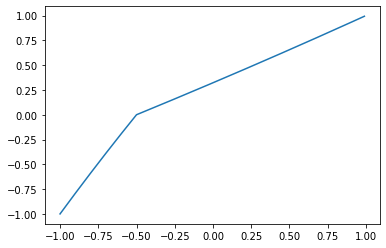

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

def two_sided_offset_exponential(gain, offset, x):
    y = 0
    s = 1
    if x < offset:
        y = 1 - (x + 1) / (offset + 1)
        s = -1
    else:
        y = (x - offset) / (1 - offset)
    return s * (math.exp(gain * y) - 1) / (math.exp(gain) - 1)

fig = plt.figure()

x = np.arange(-1.0, 1.0, .01)
y = np.array([two_sided_offset_exponential(.1, -.5, xi) for xi in x])
plt.plot(x,y)
plt.show()


In [1]:
def f1():
    x = 1
    def f2():
        print('inner: ', x)
    
    f2()
    x = 2
    f2()
    
f1()

inner:  1
inner:  2
